In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../moblie_data/train_clean_cutdup.csv')
test = pd.read_csv('../moblie_data/test_clean.csv')
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [3]:
train['current_service'] = train['current_service'].astype(int).astype(str)
train['gender'] = train['gender'].astype(str)
test['gender'] = test['gender'].astype(str)
train[['contract_type','net_service','complaint_level']] = train[['contract_type','net_service','complaint_level']].astype(str)
test[['contract_type','net_service','complaint_level']] = test[['contract_type','net_service','complaint_level']].astype(str)

In [4]:
#去除train里total_fee na值列(已在fe中去除)
#train.dropna(subset=['2_total_fee'],inplace=True)

In [6]:
train[train[['2_total_fee','3_total_fee']].isnull().values==True]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id


In [7]:
test[test[['2_total_fee','3_total_fee']].isnull().values==True]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,user_id
131428,4,0,1,61.73,NaN,NaN,73.2,1027.356342,0,0,...,1027.40856,1.283333,1.283333,0.0,2,25.0,3,1,0.0,G2sq16HZSxYagKwL
131428,4,0,1,61.73,NaN,NaN,73.2,1027.356342,0,0,...,1027.40856,1.283333,1.283333,0.0,2,25.0,3,1,0.0,G2sq16HZSxYagKwL
170278,1,0,2,39.90,77.0,NaN,0.0,0.000000,0,0,...,0.00000,0.000000,6.833333,0.0,1,22.0,3,1,0.0,lVFau8U7twgrPSxL


In [23]:
# 把total_fee fillna 0 
# train[['2_total_fee','3_total_fee']]=train[['2_total_fee','3_total_fee']].fillna(0)

In [24]:
# test的NA也填0
# test[['2_total_fee','3_total_fee']]=test[['2_total_fee','3_total_fee']].fillna(0)

In [5]:
xgb_train = pd.get_dummies(train.iloc[:,:-2])
xgb_label = train.current_service
xgb_train = pd.concat([xgb_train,xgb_label],axis=1)

In [6]:
xgb_test = pd.get_dummies(test.iloc[:,:-1])

In [22]:
train_1 = xgb_train[train.service_type == 1].iloc[:,1:]
train_3 = xgb_train[train.service_type == 3].iloc[:,1:]
train_4 = xgb_train[train.service_type == 4].iloc[:,1:]

test_1 = xgb_test[test.service_type == 1].iloc[:,1:]
test_3 = xgb_test[test.service_type == 3].iloc[:,1:]
test_4 = xgb_test[test.service_type == 4].iloc[:,1:]

In [8]:
train_1.head()

,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_time,is_promise_low_consume,...,net_service_4,net_service_9,gender_0,gender_1,gender_2,complaint_level_0,complaint_level_1,complaint_level_2,complaint_level_3,current_service
1,0,10,265.2,261.2,208.5,174.5,0.000000,1,0.0,0,...,1,0,0,1,0,1,0,0,0,90063345
2,0,12,44.5,70.2,69.0,61.4,2598.397406,0,0.0,0,...,1,0,0,0,1,1,0,0,0,90109916
6,0,12,33.6,32.7,38.7,45.7,0.000000,0,0.0,0,...,1,0,0,1,0,1,0,0,0,90063345
11,0,7,89.0,91.0,90.6,126.1,0.000000,1,0.0,0,...,1,0,0,1,0,1,0,0,0,90155946
15,0,7,60.3,145.3,78.2,94.7,0.000000,1,0.0,0,...,1,0,0,1,0,1,0,0,0,90063345


In [9]:
test_1.head()

,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_time,is_promise_low_consume,...,net_service_3,net_service_4,net_service_9,gender_0,gender_1,gender_2,complaint_level_0,complaint_level_1,complaint_level_2,complaint_level_3
1,0,5,86.7,74.20,57.10,68.90,200.0,1,0.0,0,...,0,1,0,0,1,0,1,0,0,0
7,0,64,66.3,64.30,47.00,60.30,1024.0,1,0.0,0,...,0,1,0,0,1,0,1,0,0,0
9,0,36,97.0,104.20,55.90,87.50,0.0,1,0.0,0,...,0,1,0,0,1,0,1,0,0,0
11,0,65,48.5,50.10,48.00,30.70,0.0,1,0.0,0,...,0,1,0,0,1,0,0,0,0,1
12,0,5,45.5,26.19,19.96,24.95,0.0,1,0.0,0,...,0,1,0,0,1,0,1,0,0,0


## 建模后特征调整

In [23]:
train_1.columns

Index(['is_mix_service', 'online_time', '1_total_fee', '2_total_fee',
       '3_total_fee', '4_total_fee', 'month_traffic', 'many_over_bill',
       'contract_time', 'is_promise_low_consume', 'pay_times', 'pay_num',
       'last_month_traffic', 'local_trafffic_month', 'local_caller_time',
       'service1_caller_time', 'service2_caller_time', 'age',
       'former_complaint_num', 'former_complaint_fee', 'contract_type_0',
       'contract_type_1', 'contract_type_12', 'contract_type_2',
       'contract_type_3', 'contract_type_6', 'contract_type_7',
       'contract_type_8', 'contract_type_9', 'net_service_2', 'net_service_3',
       'net_service_4', 'net_service_9', 'gender_0', 'gender_1', 'gender_2',
       'complaint_level_0', 'complaint_level_1', 'complaint_level_2',
       'complaint_level_3', 'current_service'],
      dtype='object')

In [24]:
train_1 = train_1.drop(['former_complaint_num', 'former_complaint_fee'],axis=1)
test_1 = test_1.drop(['former_complaint_num', 'former_complaint_fee'],axis=1)

## xgboost建模(type1 and type4)

In [25]:
from sklearn.model_selection import train_test_split

def split_data(train, type):
    X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], 
                                                        train.iloc[:,-1].astype('str'), random_state=0)

    X_total = train.iloc[:,:-1]
    y_total = train.iloc[:,-1].astype('str')
    
    ## needs code viewed
    def change_class_1(y):
        y[y == '90063345'] = 0
        y[y == '90109916'] = 1
        y[y == '90155946'] = 2
        return y

    def change_class_4(y):
        y[y == '89950166'] = 0
        y[y == '89950167'] = 1
        y[y == '99999828'] = 2
        y[y == '89016252'] = 3
        y[y == '89950168'] = 4
        y[y == '99999827'] = 5
        y[y == '99999826'] = 6
        y[y == '99999830'] = 7
        y[y == '99999825'] = 8
        y[y == '89016253'] = 9
        y[y == '89016259'] = 10
        return y
    
    if(type == 1):
        y_train = change_class_1(y_train)
        y_test = change_class_1(y_test)
        y_total = change_class_1(y_total)
    else:
        y_train = change_class_4(y_train)
        y_test = change_class_4(y_test)
        y_total = change_class_4(y_total)
        
    return X_train,X_test,X_total,y_train,y_test,y_total

In [45]:
X_train,X_test,X_total,y_train,y_test,y_total = split_data(train_4, 4)

In [46]:
X_train.columns

Index(['is_mix_service', 'online_time', '1_total_fee', '2_total_fee',
       '3_total_fee', '4_total_fee', 'month_traffic', 'many_over_bill',
       'contract_time', 'is_promise_low_consume', 'pay_times', 'pay_num',
       'last_month_traffic', 'local_trafffic_month', 'local_caller_time',
       'service1_caller_time', 'service2_caller_time', 'age',
       'former_complaint_num', 'former_complaint_fee', 'contract_type_0',
       'contract_type_1', 'contract_type_12', 'contract_type_2',
       'contract_type_3', 'contract_type_6', 'contract_type_7',
       'contract_type_8', 'contract_type_9', 'net_service_2', 'net_service_3',
       'net_service_4', 'net_service_9', 'gender_0', 'gender_1', 'gender_2',
       'complaint_level_0', 'complaint_level_1', 'complaint_level_2',
       'complaint_level_3'],
      dtype='object')

In [47]:
y_train.value_counts()

0     57886
1     30744
3     23643
2     22668
4     15181
5     13788
6     12372
7      9076
8      8687
9      6533
10     5852
Name: current_service, dtype: int64

In [48]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

dtotal = xgb.DMatrix(X_total,label=y_total)

In [52]:
param = {'max_depth':6 , 'silent':1, 'objective':'multi:softprob',
         'subsample':0.9, 'colsample_bytree':0.9,
         'learning_rate':0.1, 'nthread':4, 'min_child_weight':2 ,
         'lambda':1, 'alpha':0, 'gamma':0,'num_class':11}
#param['eval_metric'] = 'mlogloss'
evallist = [(dtrain,'train'),(dtest,'eval')]

In [31]:
%%time
num_round = 1500
bst = xgb.train(param.items(), dtrain, num_round, evals = evallist, early_stopping_rounds = 50)

[0]	train-merror:0.01771	eval-merror:0.018146
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 50 rounds.
[1]	train-merror:0.016809	eval-merror:0.017466
[2]	train-merror:0.016734	eval-merror:0.017222
[3]	train-merror:0.016077	eval-merror:0.016525
[4]	train-merror:0.015932	eval-merror:0.016385
[5]	train-merror:0.015636	eval-merror:0.016089
[6]	train-merror:0.015566	eval-merror:0.016071
[7]	train-merror:0.015432	eval-merror:0.015705
[8]	train-merror:0.015299	eval-merror:0.015444
[9]	train-merror:0.015142	eval-merror:0.015304
[10]	train-merror:0.015089	eval-merror:0.015252
[11]	train-merror:0.01488	eval-merror:0.015113
[12]	train-merror:0.014654	eval-merror:0.014834
[13]	train-merror:0.014537	eval-merror:0.01459
[14]	train-merror:0.014264	eval-merror:0.014137
[15]	train-merror:0.013701	eval-merror:0.013648
[16]	train-merror:0.013451	eval-merror:0.013457
[17]	train-merror:0.013364	eval-merror:0.013422
[1

[168]	train-merror:0.002597	eval-merror:0.004759
[169]	train-merror:0.002597	eval-merror:0.004741
[170]	train-merror:0.002557	eval-merror:0.004706
[171]	train-merror:0.002522	eval-merror:0.004689
[172]	train-merror:0.002516	eval-merror:0.004724
[173]	train-merror:0.002487	eval-merror:0.004706
[174]	train-merror:0.002469	eval-merror:0.004689
[175]	train-merror:0.002458	eval-merror:0.004672
[176]	train-merror:0.00244	eval-merror:0.004654
[177]	train-merror:0.002435	eval-merror:0.004672
[178]	train-merror:0.002411	eval-merror:0.004602
[179]	train-merror:0.002388	eval-merror:0.004637
[180]	train-merror:0.002382	eval-merror:0.004654
[181]	train-merror:0.002347	eval-merror:0.004637
[182]	train-merror:0.00233	eval-merror:0.004584
[183]	train-merror:0.002318	eval-merror:0.004602
[184]	train-merror:0.002307	eval-merror:0.004549
[185]	train-merror:0.002307	eval-merror:0.004532
[186]	train-merror:0.002272	eval-merror:0.004532
[187]	train-merror:0.002254	eval-merror:0.004532
[188]	train-merror:0.0

[337]	train-merror:0.001017	eval-merror:0.004114
[338]	train-merror:0.001005	eval-merror:0.004149
[339]	train-merror:0.000999	eval-merror:0.004166
[340]	train-merror:0.000982	eval-merror:0.004149
[341]	train-merror:0.000994	eval-merror:0.004149
[342]	train-merror:0.000982	eval-merror:0.004166
[343]	train-merror:0.000976	eval-merror:0.004166
[344]	train-merror:0.000976	eval-merror:0.004166
[345]	train-merror:0.000976	eval-merror:0.004149
[346]	train-merror:0.000976	eval-merror:0.004149
[347]	train-merror:0.000982	eval-merror:0.004149
[348]	train-merror:0.000976	eval-merror:0.004166
[349]	train-merror:0.000965	eval-merror:0.004183
[350]	train-merror:0.000965	eval-merror:0.004183
[351]	train-merror:0.000959	eval-merror:0.004201
[352]	train-merror:0.000947	eval-merror:0.004201
[353]	train-merror:0.000947	eval-merror:0.004183
[354]	train-merror:0.000935	eval-merror:0.004201
[355]	train-merror:0.000935	eval-merror:0.004166
[356]	train-merror:0.00093	eval-merror:0.004183
[357]	train-merror:0.

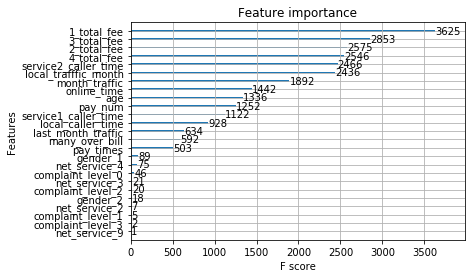

In [32]:
xgb.plot_importance(bst)

In [53]:
%%time
#全部数据训练
num_round = 1200
bst = xgb.train(param.items(), dtotal, num_round)

CPU times: user 3h 2min 34s, sys: 25.3 s, total: 3h 3min
Wall time: 45min 58s


In [54]:
bst.save_model('./model/xgb_type4_09141500_agena.model')

In [40]:
#分割开的训练集的预测
y_pred = pd.DataFrame(bst.predict(xgb.DMatrix(X_test))).idxmax(axis=1)

## 加载模型

In [59]:
bst = xgb.Booster({'nthread':4}) #init model
bst.load_model("./model/xgb_type1_09141500_agena.model") # load data

## 预测，整理表格

In [55]:
def submit(split_test, type):
    pred = bst.predict(xgb.DMatrix(split_test))
    df_p1 = pd.DataFrame(pred)
    p1_idmax = df_p1.idxmax(axis=1)
    def change_class_1(y):
        y[y == 0] = 90063345
        y[y == 1] = 90109916
        y[y == 2] = 90155946
        return y

    def change_class_4(y):
        y[y == 0] = 89950166
        y[y == 1] = 89950167
        y[y == 2] = 99999828
        y[y == 3] = 89016252
        y[y == 4] = 89950168
        y[y == 5] = 99999827
        y[y == 6] = 99999826
        y[y == 7] = 99999830
        y[y == 8] = 99999825
        y[y == 9] = 89016253
        y[y == 10] = 89016259
        return y
    
    if(type == 1):
        p1_idmax = change_class_1(p1_idmax)
    elif(type == 4):
        p1_idmax = change_class_4(p1_idmax)
    
    #test 为总test
    final_pred = test[test.service_type == type][['user_id']]
    final_pred.reset_index(drop=True, inplace=True)
    final_pred['predict'] = p1_idmax
    
    return final_pred

In [60]:
final_pred_1 = submit(test_1, 1)
#final_pred_4 = submit(test_4, 4)

In [57]:
# 验证contract_time预测值是否是828最多
ct_na = pd.merge(final_pred_4, pd.DataFrame(test[test.contract_time.isna()]['user_id'])
                 , how='right', on = 'user_id')
ct_na.predict.value_counts()

99999828    424
99999825      8
99999827      6
89950166      5
89950167      1
99999826      1
Name: predict, dtype: int64

In [61]:
final_pred_1.predict.value_counts()

90063345    85907
90109916    11446
90155946     6592
Name: predict, dtype: int64

In [62]:
final_pred_4.predict.value_counts()

89950166    41083
89950167    21800
99999828    15608
89016252    15360
99999827     9846
89950168     9785
99999826     9387
99999825     6180
99999830     5655
89016259     4195
89016253     4015
Name: predict, dtype: int64

In [62]:
final_pred_4[final_pred_4.user_id == 'G2sq16HZSxYagKwL']

,user_id,predict
65903,G2sq16HZSxYagKwL,89016253


## 填充pred3，合并结果

In [63]:
final_pred_3 = test[test.service_type == 3][['user_id']]
final_pred_3['predict'] = 99104722

In [64]:
pred_total = pd.concat([final_pred_1,final_pred_3,final_pred_4],axis=0)

In [65]:
submit = pd.read_csv('../moblie_data/submit_sample.csv')

In [66]:
final_submit = pd.merge(submit,pred_total,how='left', on='user_id')
final_submit['predict'] = final_submit['predict_y']
final_submit = final_submit.drop(['predict_x','predict_y'], axis=1)

In [67]:
final_submit.to_csv('../moblie_data/first_xgb_09141400.csv', index=False)

## 替换重复feature客户的结果

In [63]:
submit_origin = pd.read_csv('../moblie_data/first_xgb.csv',index_col=None)

In [64]:
duplicate = pd.read_csv('../moblie_data/duplicate.csv')
duplicate = duplicate.iloc[:,1:3]

In [65]:
duplicate.columns = ['predict','user_id']

In [66]:
duplicate.columns

Index(['predict', 'user_id'], dtype='object')

In [67]:
duplicate = duplicate[submit_origin.columns]

In [68]:
dup_dict = duplicate.set_index('user_id').T.to_dict('list')

/Users/fu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [69]:
submit_change = pd.merge(submit_origin, duplicate, how='left', on='user_id')

In [70]:
submit_change

,user_id,predict_x,predict_y
0,iC37kmjDBqrctznl,89950166,NaN
1,jSf9GCWynNVFwOtQ,90063345,NaN
2,j5hsAm8YagTcRXiB,89950166,NaN
3,6EC1H9IjDYcGFP4v,99999830,NaN
4,a0utDgZkXvJ1oFOs,89950166,NaN
5,g20wiYlHF78SKZ1N,89950166,NaN
6,IxS9osZtEX5MFQ1W,89950166,NaN
7,2ylUZKFMijLGCHf8,90063345,NaN
8,RMOYTK81wxcXlkas,99999827,NaN
9,lHKM6eyNR2rBXh7i,90063345,NaN


In [71]:
def sub_predict(df):
    if(pd.isna(df.predict_y)):
        df.predict_y = df.predict_x
    return df

In [72]:
submit_change = submit_change.apply(sub_predict,axis=1)

In [73]:
submit_change['predict'] = submit_change.predict_y
submit_change.iloc[:,[0,3]].to_csv('../moblie_data/firstxgb_feature_dup.csv', index=False)

In [74]:
submit_change.predict_y.value_counts()

90063345    85908
89950166    41279
89950167    21577
99104722    15706
99999828    15477
89016252    15281
90109916    11436
99999827     9800
89950168     9710
99999826     9626
90155946     6601
99999825     6238
99999830     5706
89016259     4336
89016253     3884
Name: predict_y, dtype: int64

In [75]:
submit_origin.predict.value_counts()

90063345    85908
89950166    41279
89950167    21577
99104722    15706
99999828    15477
89016252    15281
90109916    11436
99999827     9800
89950168     9710
99999826     9626
90155946     6601
99999825     6238
99999830     5706
89016259     4336
89016253     3884
Name: predict, dtype: int64

## preview results

In [57]:
# for k in dup_dict:
#     dup_dict[k] = dup_dict[k][0]

In [63]:
# submit_origin.predict.map(dup_dict)